In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.cluster.hierarchy as sch
from matplotlib.patches import Patch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

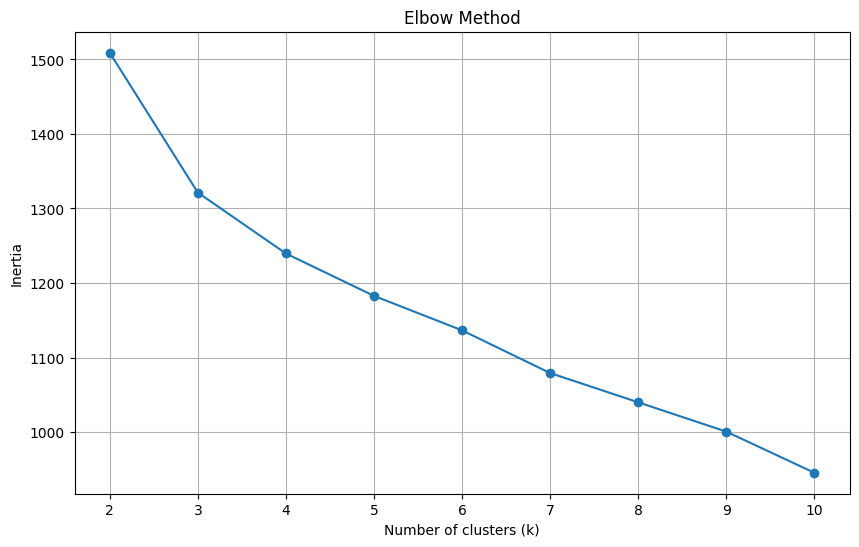

In [51]:
# Determine the current file path and the parent directory path
current_file_path = Path(__name__).resolve()
parent_directory_path = current_file_path.parent.parent

# Define the input file path
input_file_path = parent_directory_path / "data" / "03_Processed" / "03_Filtered_Selected_Features.csv"

# Load the filtered data from the CSV file
data = pd.read_csv(input_file_path)

text_columns = data.select_dtypes(include=['object']).columns
data_clean = data.drop(columns=text_columns)

data_clean_1 = data_clean.drop(columns=['Participant ID'])


# Determining the number of clusters using the Elbow Method
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_clean_1)
    inertia.append(kmeans.inertia_)

# Visualization of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

# Optimal number of clusters
optimal_clusters = 2

# Performing k-means clustering
kmeans = KMeans(n_clusters=optimal_clusters)
data_clean['Cluster'] = kmeans.fit_predict(data_clean_1)+1

# Displaying centroids
centroids = kmeans.cluster_centers_

# Adding cluster labels to the original data
data_clean['Cluster'] = kmeans.labels_+1


In [52]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Verification of cluster validity
silhouette_avg = silhouette_score(data_clean_1, data_clean['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

print(f'Inertia: {kmeans.inertia_}')

davies_bouldin = davies_bouldin_score(data_clean_1, data_clean['Cluster'])
print(f'Davies-Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.21307456243085843
Inertia: 1505.8962703962702
Davies-Bouldin Index: 1.6610260638505565


Results of k-means clustering:
Cluster 1 Participant IDs: [3, 7, 9, 11, 12, 14, 15, 16, 18, 19, 20, 22, 27, 35, 36, 37, 41, 43, 46, 47, 48, 50, 52, 54, 57, 61]
Cluster 2 Participant IDs: [1, 2, 4, 5, 6, 10, 13, 17, 21, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 38, 42, 44, 45, 49, 51, 53, 55, 58, 59, 63, 64, 67]




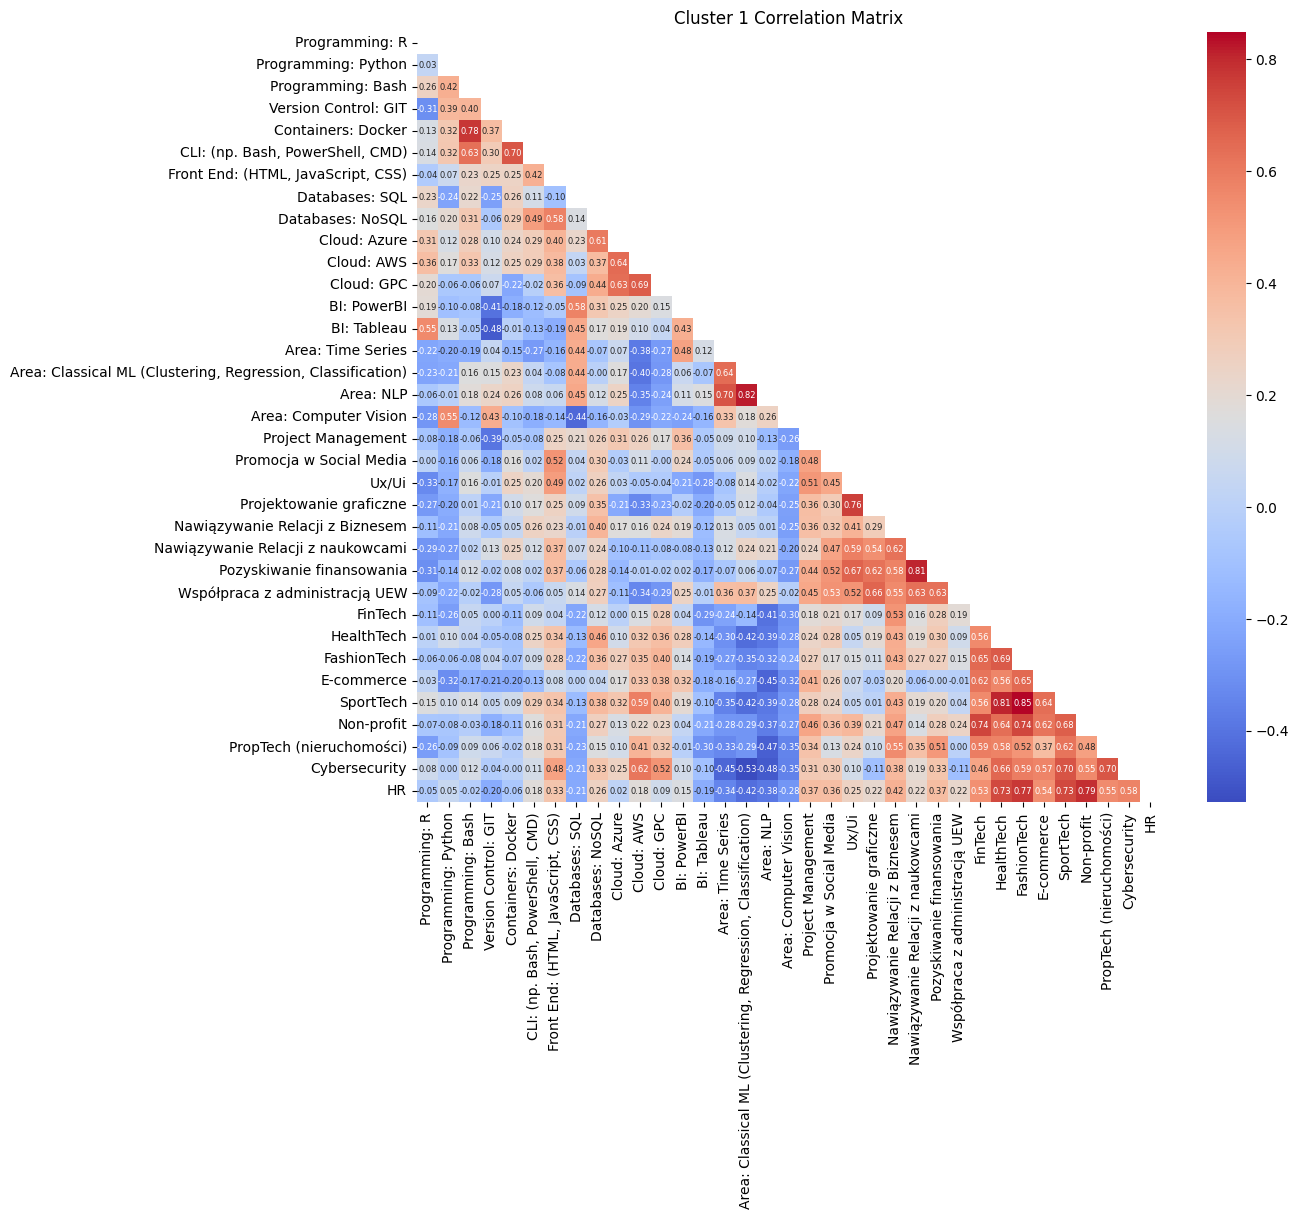

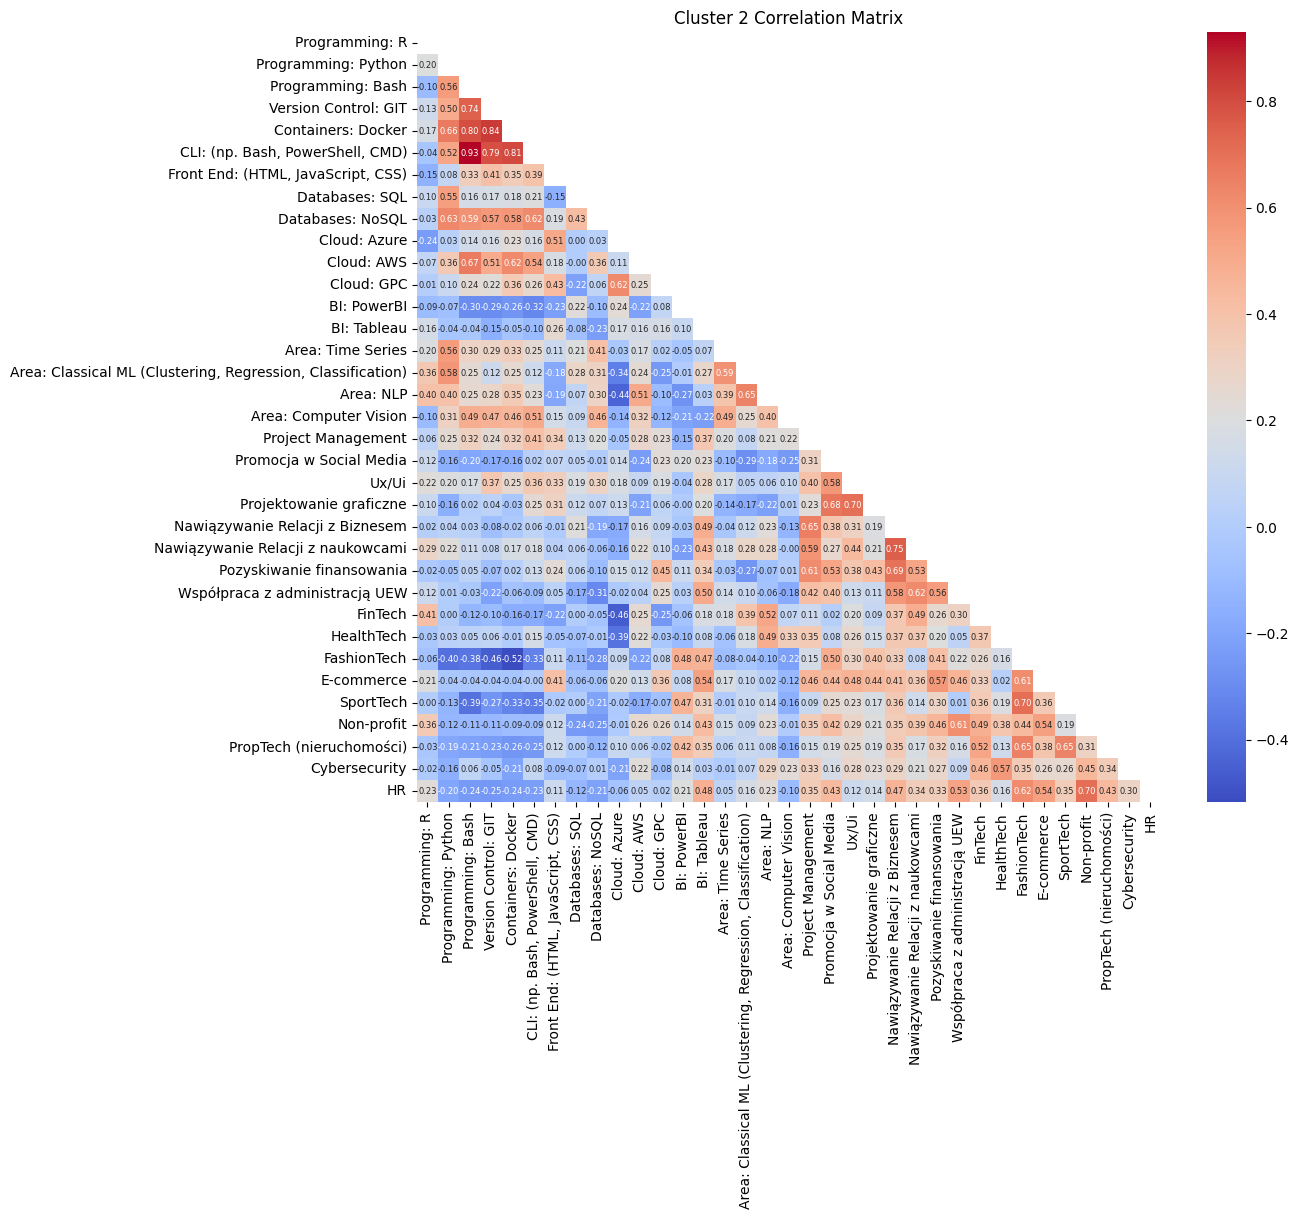

In [53]:
# Displaying the clustering results
print('Results of k-means clustering:')
for cluster in range(1, optimal_clusters+1):
    cluster_ids = data_clean[data_clean['Cluster'] == cluster]['Participant ID'].tolist()
    print(f'Cluster {cluster} Participant IDs: {cluster_ids}')
print('\n')

# Visualizing the correlation matrix for each cluster
for cluster in range(1, optimal_clusters + 1):
    cluster_data = data_clean_1[data_clean['Cluster'] == cluster]
    correlation_matrix = cluster_data.corr()
    
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, fmt='.2f',  annot_kws={"size": 6})
    plt.title(f'Cluster {cluster} Correlation Matrix')
    plt.show()